In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
X_train[0].shape

(32, 32, 3)

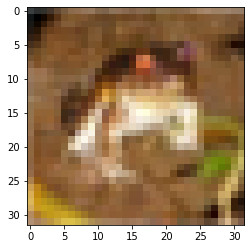

In [10]:
plt.imshow(X_train[0])

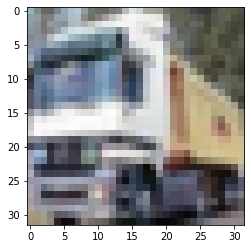

In [11]:
plt.imshow(X_train[1])

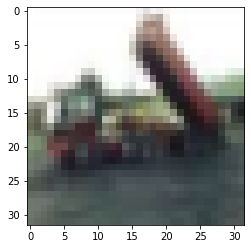

In [12]:
plt.imshow(X_train[2])

In [13]:
X_train[0].max()

255

In [14]:
X_train = X_train / 255

In [15]:
X_test = X_test / 255

In [16]:
X_test.shape

(10000, 32, 32, 3)

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train, 10)

In [21]:
y_cat_test = to_categorical(y_test, 10)

In [23]:
y_train[0]

array([6], dtype=uint8)

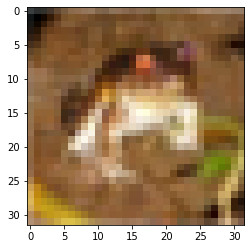

In [24]:
plt.imshow(X_train[0])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
28 * 28

784

In [28]:
32 * 32 * 3

3072

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
model.fit(X_train, y_cat_train, epochs=15,
         validation_data=(X_test, y_cat_test), callbacks=[early_stop])

2022-03-28 21:27:45.140553: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/15
   6/1563 [..............................] - ETA: 38s - loss: 2.2991 - accuracy: 0.1354  

2022-03-28 21:27:51.125112: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 21:27:51.137837: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 21:27:51.236761: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-28 21:27:51.236918: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.


1563/1563 [==============================] - 24s 14ms/step - loss: 1.4714 - accuracy: 0.4707 - val_loss: 1.2733 - val_accuracy: 0.5411
Epoch 2/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1529 - accuracy: 0.5936 - val_loss: 1.1499 - val_accuracy: 0.5919
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0011 - accuracy: 0.6499 - val_loss: 1.0415 - val_accuracy: 0.6376
Epoch 4/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8959 - accuracy: 0.6887 - val_loss: 0.9773 - val_accuracy: 0.6578
Epoch 5/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8069 - accuracy: 0.7186 - val_loss: 0.9581 - val_accuracy: 0.6680
Epoch 6/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7271 - accuracy: 0.7456 - val_loss: 0.9481 - val_accuracy: 0.6805
Epoch 7/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6497 - accuracy: 0.7708 - val_loss: 1.0116 - val_accura